<img src="https://upload.wikimedia.org/wikipedia/commons/8/89/TheNorthFace_logo.svg" alt="THE NORTH FACE LOGO" width="50%" />

# The North Face e-commerce : boosting online sales !

# Deliverable 📬

To complete this project, your team should:

- Train at least one **clustering model** on the corpus and display wordclouds describing the clusters
- Develop a simple python code that allows a user to type the id of a product he's interested in, and then get a list of similar items
- Train at least one **TruncatedSVD model** on the corpus and display wordclouds describing the latent topics


## Part 1 : Groups of products with similar descriptions

Import & installs :

In [ ]:
# Install spacy

!pip install spacy -q
!python -m spacy download en_core_web_sm -q
!pip install wordcloud -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 40.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [250]:
from google.colab import files
import chardet
import pandas as pd
import spacy
import en_core_web_sm
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from spacy.lang.en.stop_words import STOP_WORDS
import matplotlib.pyplot as plt
import wordcloud
import re
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import spacy
import random
nlp = en_core_web_sm.load()

📂 Loading and Preprocessing

In [251]:
uploaded = files.upload()

with open(list(uploaded.keys())[0], 'rb') as f:
    result = chardet.detect(f.read())

# Read the file using the detected encoding
dataset = pd.read_csv(list(uploaded.keys())[0], encoding=result['encoding'])

Saving sample-data - Copie.csv to sample-data - Copie (10).csv


In [252]:
def clean_dataset(dataset):
    # Fill missing values with an empty string and convert to lowercase
    dataset["clean_documents"] = dataset['description'].fillna('').apply(lambda x: x.lower())

    # Remove HTML tags
    dataset["clean_documents"] = dataset["clean_documents"].\
        apply(lambda x: x.replace("<li>", '')\
                        .replace("</li>", '')\
                        .replace("<br>", '')\
                        .replace("</br>", '')\
                        .replace("<b>", '')\
                        .replace("</b>", '')\
                        .replace("<ul>", '')\
                        .replace("</ul>", ''))

    # Remove non-alphanumeric characters
    dataset["clean_documents"] = dataset["clean_documents"].str.replace(r"[^A-Za-z0-9]+", " ")

    # Return the cleaned dataset
    return dataset


In [253]:
clean_dataset(dataset)

,id,description,clean_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an..."
...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms - cut loose from the maddening c...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew - this crew takes the edge off fick...
497,498,All-time shell - No need to use that morning T...,all-time shell - no need to use that morning t...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all-wear cargo shorts - all-wear cargo shorts ...


In [254]:
def tokenize_dataset(dataset):
    nlp = spacy.load("en_core_web_sm")
    # Tokenize and lemmatize the cleaned documents
    dataset["tokenized_documents"] = dataset["clean_documents"]\
                                    .fillna('')\
                                    .apply(lambda x: [token.lemma_ for token in nlp(x) if token.text not in STOP_WORDS])

    # Return the tokenized dataset
    return dataset

In [255]:
tokenize_dataset(dataset)

,id,description,clean_documents,tokenized_documents
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul..."
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ..."
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ..."
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ..."
...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms - cut loose from the maddening c...,"[cap, 2, bottom, -, cut, loose, madden, crowd,..."
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew - this crew takes the edge off fick...,"[cap, 2, crew, -, crew, take, edge, fickle, we..."
497,498,All-time shell - No need to use that morning T...,all-time shell - no need to use that morning t...,"[-, time, shell, -, need, use, morning, time, ..."
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all-wear cargo shorts - all-wear cargo shorts ...,"[-, wear, cargo, short, -, -, wear, cargo, sho..."


In [256]:
def prepare_dataset_for_nlp(dataset):
    # Convert the tokenized documents into a format that is ready for NLP tasks
    dataset["nlp_ready"] = dataset["tokenized_documents"].apply(lambda x: (' '.join(x)).strip())

    # Return the prepared dataset
    return dataset

prepare_dataset_for_nlp(dataset)

,id,description,clean_documents,tokenized_documents,nlp_ready
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ..."
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin..."
...,...,...,...,...,...
495,496,Cap 2 bottoms - Cut loose from the maddening c...,cap 2 bottoms - cut loose from the maddening c...,"[cap, 2, bottom, -, cut, loose, madden, crowd,...",cap 2 bottom - cut loose madden crowd search u...
496,497,Cap 2 crew - This crew takes the edge off fick...,cap 2 crew - this crew takes the edge off fick...,"[cap, 2, crew, -, crew, take, edge, fickle, we...",cap 2 crew - crew take edge fickle weather . c...
497,498,All-time shell - No need to use that morning T...,all-time shell - no need to use that morning t...,"[-, time, shell, -, need, use, morning, time, ...",- time shell - need use morning time umbrella ...
498,499,All-wear cargo shorts - All-Wear Cargo Shorts ...,all-wear cargo shorts - all-wear cargo shorts ...,"[-, wear, cargo, short, -, -, wear, cargo, sho...",- wear cargo short - - wear cargo short bask g...


In [257]:
vectorizer = TfidfVectorizer(stop_words='english', smooth_idf=True)
X = vectorizer.fit_transform(dataset['nlp_ready'])
dense = X.toarray()

In [258]:
def find_optimal_eps_min_samples(X, eps_range=np.arange(0.4, 0.71, 0.01), min_samples_range=range(2, 10), max_outliers_percent=20):
    def count_val(val, T):
        return sum(1 for i in T if i == val)

    best_num_clusters = 0
    best_eps = 0
    best_min_samples = 0
    best_outliers_percent = 100

    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
            dbscan.fit(X)
            clusters = np.unique(dbscan.labels_)
            num_clusters = len(clusters)
            outliers_percent = count_val(-1, dbscan.labels_) / len(dbscan.labels_) * 100
            if 10 <= num_clusters <= 20 and outliers_percent < max_outliers_percent and outliers_percent < best_outliers_percent:
                best_num_clusters = num_clusters
                best_eps = eps
                best_min_samples = min_samples
                best_outliers_percent = outliers_percent

    return best_eps, best_min_samples,best_outliers_percent

Optimal values for eps and min_samples :

In [259]:
best_eps, best_min_samples,best_outliers_percent = find_optimal_eps_min_samples(X)
print("Best eps value: {}".format(round(best_eps,3)))
print("Best min_samples value: {}".format(best_min_samples))
print("Best outliers %: {}".format(round(best_outliers_percent,3)))

Best eps value: 0.7
Best min_samples value: 3
Best outliers %: 6.6


In [260]:
dbscan = DBSCAN(eps=0.7, min_samples=3, metric="cosine")
dbscan.fit(X)
clusters = np.unique(dbscan.labels_)
dataset["dbscan_cluster"] = dbscan.labels_

In [261]:
dataset.head()

,id,description,clean_documents,tokenized_documents,nlp_ready,dbscan_cluster
0,1,Active classic boxers - There's a reason why o...,active classic boxers - there's a reason why o...,"[active, classic, boxer, -, reason, boxer, cul...",active classic boxer - reason boxer cult favor...,0
1,2,Active sport boxer briefs - Skinning up Glory ...,active sport boxer briefs - skinning up glory ...,"[active, sport, boxer, brief, -, skin, glory, ...",active sport boxer brief - skin glory require ...,0
2,3,Active sport briefs - These superbreathable no...,active sport briefs - these superbreathable no...,"[active, sport, brief, -, superbreathable, -, ...",active sport brief - superbreathable - fly bri...,0
3,4,"Alpine guide pants - Skin in, climb ice, switc...","alpine guide pants - skin in, climb ice, switc...","[alpine, guide, pant, -, skin, ,, climb, ice, ...","alpine guide pant - skin , climb ice , switch ...",1
4,5,"Alpine wind jkt - On high ridges, steep ice an...","alpine wind jkt - on high ridges, steep ice an...","[alpine, wind, jkt, -, high, ridge, ,, steep, ...","alpine wind jkt - high ridge , steep ice alpin...",1


We takes texts grouped by a clustering algorithm and creates word clouds to visualize the most frequent words in each group. It first lemmatizes the texts (reduces words to their base form), removes the most common words to focus on the most relevant ones, and then generates and displays the word clouds for each selected group. This helps quickly identify the main themes of each group of texts.

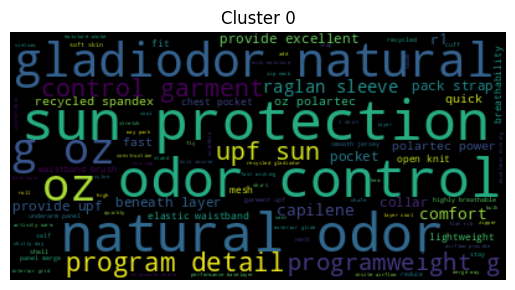

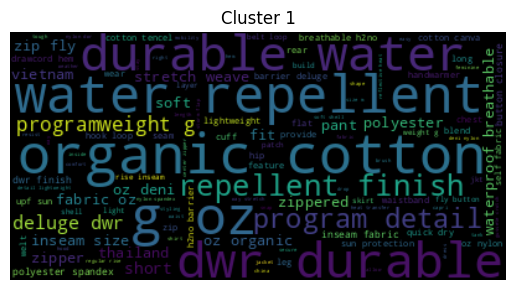

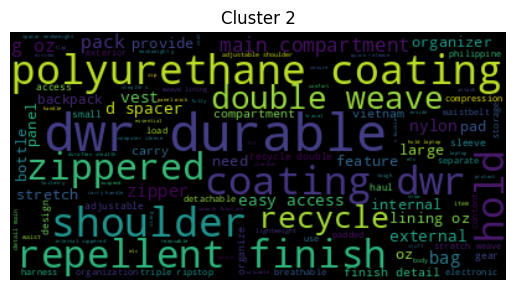

In [262]:
nlp = spacy.load("en_core_web_sm")
for c in clusters[1:4]:
    sub_cat = dataset.query(f"dbscan_cluster == {c}")
    corpus = " ".join([str(item) for item in sub_cat["nlp_ready"].to_list()])
    doc = nlp(corpus)

    # Lemmatize the corpus
    lemma_corpus = [token.lemma_ for token in doc]
    lemmadf = pd.Series(lemma_corpus)

    # Calculate word frequencies
    word_counts = lemmadf.value_counts().reset_index()
    word_counts.columns = ['word', 'count']
    word_counts["percent"] = word_counts["count"] / sum(word_counts["count"]) * 100

    # IdentifyCommon words
    common = word_counts[word_counts["percent"] > 1.0]
    stop_words = list(common["word"])
    stop_words_v2 = list(STOP_WORDS) + stop_words

    # Word cloud
    wd = WordCloud(stopwords=stop_words_v2)
    cloud = wd.generate(corpus)
    plt.imshow(cloud, interpolation='bilinear')
    plt.title(f"Cluster {c}")
    plt.axis('off')
    plt.show()


## Part 2 - Recommender system

In [263]:
class RecommenderSystem:
    def __init__(self, dataset):
        self.dataset = dataset
    #Return 5 product ids
    def find_similar_items(self, product_id):
        try:
            cluster_id = int(self.dataset.loc[self.dataset["id"] == product_id,'dbscan_cluster'])
            similar_items = self.dataset.loc[(self.dataset["dbscan_cluster"] == cluster_id) & (self.dataset["id"] != product_id),"id"]
            sample = similar_items.sample(min(5,len(similar_items))) # Prend un échantillon d'au plus 5 articles
            return sample
        except:
            # Retourne une série vide si aucun article similaire n'est trouvé
            return pd.Series([])

    def reco_system(self):
        while True:
            try:
                product_id = int(input("Quel produit souhaitez-vous acheter ? (Entrez l'ID du produit ou 0 pour sortir) : "))
                if product_id == 0:
                    break

                print()
                item = self.dataset.loc[self.dataset['id'] == product_id]
                if not item.empty:
                    item_desc = item['clean_documents'].values[0]
                    print("Produit trouvé dans la base de données, description ci-dessous :")
                    print(item_desc)
                    print()

                    similar_items = self.find_similar_items(product_id)
                    if not similar_items.empty:
                        print("Vous pourriez également être intéressé par les produits suivants :")
                        print()
                        for i in similar_items:
                            similar_item_desc = self.dataset.loc[self.dataset['id'] == i, 'clean_documents'].values[0]
                            print("Article #", i)
                            print(similar_item_desc)
                            print('-' * 50)
                    else:
                        print("Aucun produit similaire trouvé dans la base de données.")
                    print()
                else:
                    print("Produit non trouvé dans la base de données. Veuillez entrer un ID de produit valide.")
            except ValueError:
                print("Veuillez entrer un ID de produit valide.")
            except IndexError:
                print("Produit non trouvé dans la base de données. Veuillez entrer un ID de produit valide.")
            except Exception as e:
                print(f"Une erreur s'est produite : {e}")

if __name__ == "__main__":
    recommender = RecommenderSystem(dataset)
    recommender.reco_system()

Quel produit souhaitez-vous acheter ? (Entrez l'ID du produit ou 0 pour sortir) : 152


<ipython-input-263-b769ed3129ce>:7: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  cluster_id = int(self.dataset.loc[self.dataset["id"] == product_id,'dbscan_cluster'])



Produit trouvé dans la base de données, description ci-dessous :
world trout t-shirt - james prosek recreates the view from above, mimicking the energy of the fish with unique line art. five dollars from the sale of each shirt will benefit world trout, an organization that supports conservation efforts and identifies and protects native fish. learn more about patagonia's fly fishing line and world trout at www.patagonia.com/fishing. made from 100% organic cotton, the tee is recyclable through the common threads recycling program.details: ringspun yarns for a softer hand taped shoulder seams screen-print inks are pvc- and phthalate-freefabric: 5.4-oz 100% organic cotton. recyclable through the common threads recycling programweight: (199 g 6.9 oz)made in usa.

Vous pourriez également être intéressé par les produits suivants :

Article # 493
'73 logo t-shirt - patagonia's timeless '73 logo t-shirt pays homage to our pioneering spirit, resonating with old- and new-schoolers alike. screen

### Part 3 : Topic modeling

Use an LSA model to automatically extract latent topics in the products' descriptions. \
Use TruncatedSVD to make some topic extraction from the TF-IDF matrix (10-20 topics).

We will reduce the dimensionality of textual data and extract main topics from a set of documents (review). It then creates a DataFrame to visualize the results of this transformation, including the original texts and main topic attribution.


TOPIC :  topic_1


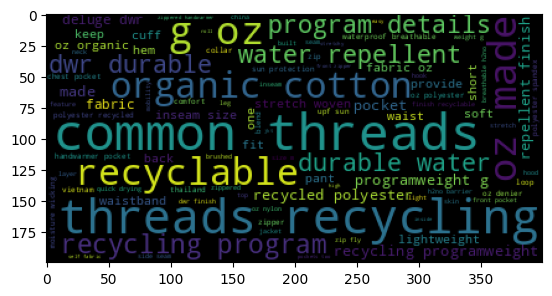


TOPIC :  topic_2


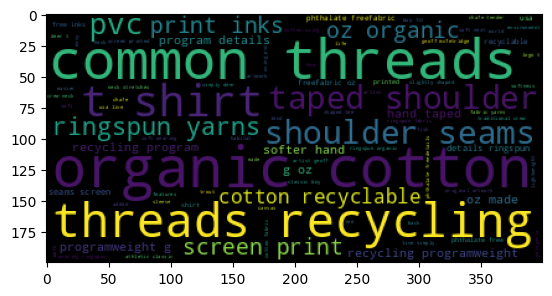


TOPIC :  topic_3


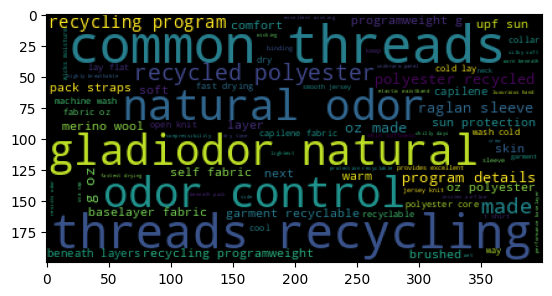


TOPIC :  topic_4


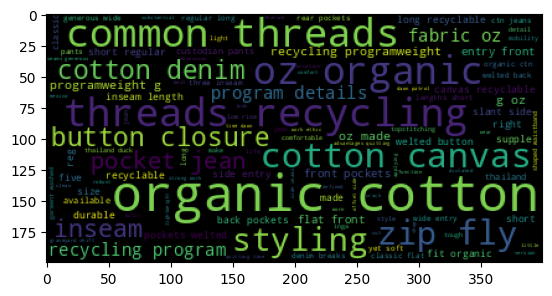


TOPIC :  topic_5


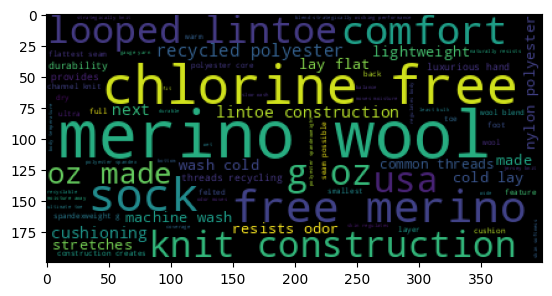


TOPIC :  topic_6


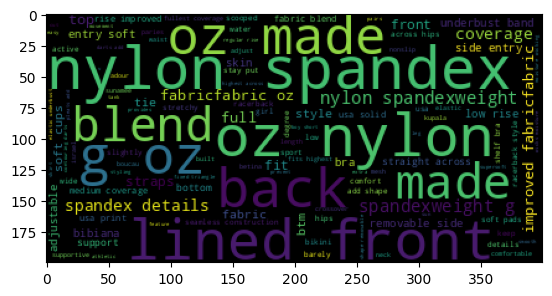


TOPIC :  topic_7


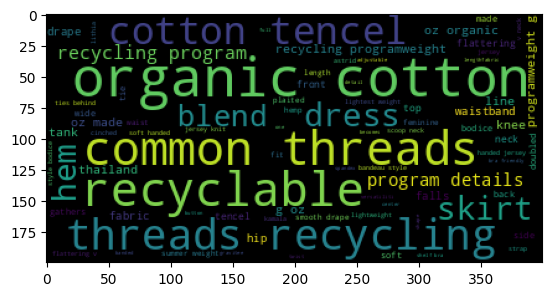


TOPIC :  topic_8


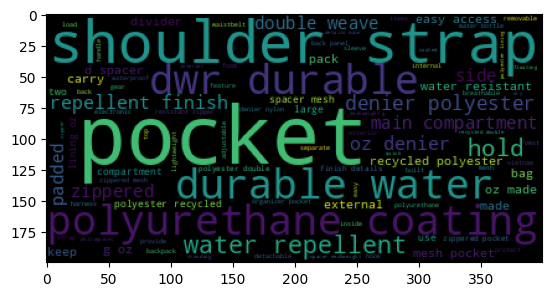


TOPIC :  topic_9


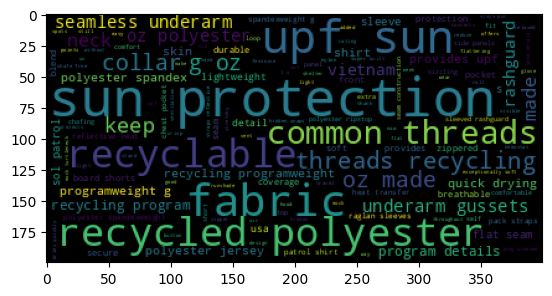


TOPIC :  topic_10


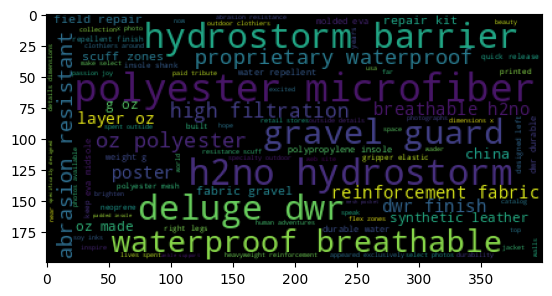

In [264]:
def display_topics(dataset, X, vectorizer):
    # Modèle de SVD
    svd_model = TruncatedSVD(n_components=10, algorithm='randomized', random_state=42)
    lsa = svd_model.fit_transform(X)
    # Df des topics encodés
    col = ['topic_{}'.format(i) for i in range(1, 11)]
    topic_encoded_df = pd.DataFrame(lsa, columns=col)
    topic_encoded_df["documents"] = dataset['clean_documents']
    topic_encoded_df["main_topic"] = [np.argmax(topic) for topic in lsa]

    #Topics
    topics_description = pd.DataFrame(svd_model.components_, columns=vectorizer.get_feature_names_out(),index=['topic_' + str(i) for i in range(svd_model.components_.shape[0])])
    topics_description = topics_description.apply(np.abs, axis=1)
    wd = WordCloud()

    for i in range(len(topic_encoded_df.columns) - 2):  # -2 pour exclure 'documents' et 'main_topic'
        print()
        print('TOPIC : ', col[i])

        if (topic_encoded_df['main_topic'] == i).any() == False:
            print('Impossible de créer un nuage de mots pour ce topic')
            continue

        texts = " ".join(topic_encoded_df.loc[topic_encoded_df['main_topic'] == i, 'documents'])
        cloud = wd.generate(texts)
        plt.imshow(cloud)
        plt.show()

display_topics(dataset, X, vectorizer)